In [1]:
import pyfirmata as pf

In [2]:
import numpy
import csv

In [3]:
board = pf.Arduino('COM3')

In [4]:
it = pf.util.Iterator(board)
it.start()

In [5]:
analog_0 = board.get_pin('a:0:i')
analog_1 = board.get_pin('a:1:i')

In [6]:
def file (fname, ls1, ls2):
    
    openfile = open(fname, "w")
    writer = csv.writer(openfile)
    (map(lambda x: [x], ls1))
    (map(lambda x: [x], ls2))
    p = zip(ls1,ls2)
    writer.writerows(p)

In [36]:
#RUN CODE ALL UP TO THIS POINT. RUN CODE WITH CURRENT SETUP TO DETERMINE THE CODE WORKS,
#SET DELAY TO 1 MIN (60 SEC) and total time to 5h(?)


deltavoltage = []
deltat = []
batvolt = []
import timeit
import time

start = time.time()



for i in range(200):
    deltavoltage.append(analog_0.read()*5)
    elapsed = time.time()
    deltat.append(elapsed-start)
    time.sleep(60)
    print([elapsed-start, analog_0.read()*5])
    
v = numpy.array(deltavoltage)
rk = 1000
print(v)
I = (v)/rk
Ru = (5-v)/I
print(Ru)


Ro = 1000
To = 0
alpha = 0.00393 #platinum

T = (Ru/Ro-1)/alpha + To

print (T)

file("IceMeltV3.csv", deltat, T)

[0.0, 2.488]
[60.00388860702515, 2.488]
[120.01296353340149, 2.488]
[180.01815724372864, 2.488]
[240.0195815563202, 2.488]
[300.02184891700745, 2.488]
[360.0284733772278, 2.488]
[420.037798166275, 2.488]
[480.0407633781433, 2.488]
[540.0570447444916, 2.488]
[600.063383102417, 2.488]
[660.0720407962799, 2.483]
[720.085921049118, 2.488]
[780.0893766880035, 2.483]
[840.1037237644196, 2.488]
[900.1086347103119, 2.483]
[960.1205487251282, 2.483]
[1020.1354699134827, 2.483]
[1080.1380786895752, 2.483]
[1140.150051832199, 2.483]
[1200.1602988243103, 2.483]
[1260.1711008548737, 2.483]
[1320.1853952407837, 2.483]
[1380.1965990066528, 2.483]
[1440.2082753181458, 2.483]
[1500.211133480072, 2.483]
[1560.22381067276, 2.483]
[1620.2367866039276, 2.483]
[1680.2461259365082, 2.483]
[1740.2586588859558, 2.483]
[1800.269945383072, 2.483]
[1860.2748336791992, 2.483]
[1920.2815325260162, 2.483]
[1980.2837793827057, 2.483]
[2040.285130739212, 2.483]
[2100.2965857982635, 2.483]
[2160.311646461487, 2.483]
[2

Initalizing and defining function that writes lists gotten from data to an excel sheet

In [33]:
deltavoltage = []
deltat = []
import timeit
import time

start = time.time()



for i in range(5):
    deltavoltage.append(analog_0.read()*5)
    elapsed = time.time()
    deltat.append(elapsed-start)
    time.sleep(1)
    print([elapsed-start, analog_0.read()*5])
print(deltavoltage)
print(deltat)


print()


[0.0, 2.4925]
[1.006387710571289, 2.4925]
[2.0176584720611572, 2.4925]
[3.0205605030059814, 2.4925]
[4.032623529434204, 2.4925]
[2.4925, 2.4925, 2.4925, 2.4925, 2.4925]
[0.0, 1.006387710571289, 2.0176584720611572, 3.0205605030059814, 4.032623529434204]



Collects voltage data over time, printing as it goes

In [34]:
v = numpy.array(deltavoltage)
rk = 1000
print(v)
I = (v)/rk
Ru = (5-v)/I
print(Ru)

#Translates given voltage to RTD voltage

[2.4925 2.4925 2.4925 2.4925 2.4925]
[1006.01805416 1006.01805416 1006.01805416 1006.01805416 1006.01805416]


In [35]:
"""RTD calibration equasion R/Ro = alpha (T-To)+1"""
#Turns voltage into temp (C) and writes file
Ro = 1000
To = 0
alpha = 0.00393 #platinum

T = (Ru/Ro-1)/alpha + To
print (T)

file("testfile.csv", deltat, T)

[1.53131149 1.53131149 1.53131149 1.53131149 1.53131149]


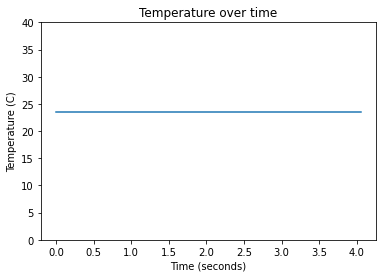

In [10]:
import matplotlib.pyplot as plt

#Plots data
plt.plot(deltat,T)
plt.title('Temperature over time')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (C)')
plt.ylim([-15,40])
plt.show()


In [34]:
import numpy
import csv

def file (fname, ls1, ls2):
    
    openfile = open("temperature.csv", "w")
    writer = csv.writer(openfile)
    (map(lambda x: [x], ls1))
    (map(lambda x: [x], ls2))
    p = zip(ls1,ls2)
    writer.writerows(p)


In [15]:
print(deltat[1])

1.0034544467926025
